In [1]:
import pandas as pd
import ExperimentData

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
loader = ExperimentData.Loader()

In [3]:
timeOnPage = loader.getTimeOnPage()
letterTransactions = loader.getLetterTransactions()[['channel','owner_channel','timestamp','approve_time']]

In [4]:
TimeByParticipant = timeOnPage[timeOnPage.page_name == 'Anagrams'][['participant__code', 'time_stamp', 'seconds_on_page']]
TimeByParticipant = TimeByParticipant.set_index('participant__code')

In [5]:
letterTransactions[['channel','owner_channel']] = letterTransactions[['channel','owner_channel']].applymap(lambda x: x.split('-')[-1])
letterTransactions.columns = ['requester','approver','request_time','approve_time']

In [7]:
letterTransactions['approve_delay_sec'] = letterTransactions.apply(lambda x: (x.approve_time - x.request_time).seconds, axis = 1)

In [8]:
df = pd.merge(letterTransactions,TimeByParticipant,how='outer',left_on='requester', right_index=True)

In [9]:
df['request_delay'] = df.apply(lambda x: abs((x.time_stamp - x.request_time).seconds - x.seconds_on_page), axis = 1)

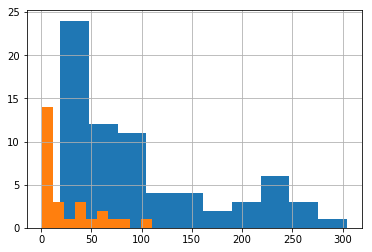

In [10]:
df.request_delay.hist()
df.approve_delay_sec.hist()